## Loading data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import plot

fields = ['X','Y','Z','CU']
pio.renderers.default='browser'
df = pd.read_csv("C:\\Users\\NIU004\\OneDrive - CSIRO\\Desktop\\Mineral sorting\\Kansanshi\\Kansanshi Bore Core\\bore core regular subregion.csv", skipinitialspace=True, usecols=fields)
x1 = 3000
x2 = x1 + 100
y1 = 13000
y2 = y1 + 100
z1 = 1300
z2 = z1+50
df = df.dropna()
df = df.loc[(pd.to_numeric(df["CU"], errors='coerce')>0.02)
            &(pd.to_numeric(df["X"], errors='coerce')>=x1) & (pd.to_numeric(df["X"], errors='coerce')<x2) 
            &(pd.to_numeric(df["Y"], errors='coerce')>=y1) & (pd.to_numeric(df["Y"], errors='coerce')<y2)
            &(pd.to_numeric(df["Z"], errors='coerce')>=z1) & (pd.to_numeric(df["Z"], errors='coerce')<z2)]
df = df.reset_index(drop=True)

## Log transformation, add noise

In [2]:
df['X'] = round(df['X'],2)
df['Y'] = round(df['Y'],2)
df['Z'] = round(df['Z'],2)
mu, sigma = 0.1, 0.01
np.random.seed(0)
noise = pd.DataFrame(np.random.normal(mu, sigma, [len(df),1])) 
noise = round(noise,2)
noise.columns = ['noise']
df['CU_log'] = np.log(df['CU'])
df['CU_log'] = round(df['CU_log'],3)

df_new = pd.concat([df['CU_log'],noise['noise']],axis=1)
df_new['CU_log_noise'] = df_new.sum(axis=1)
df = pd.concat([df,df_new],axis=1)

df = df.sample(frac=1,random_state=10)
df = df.reset_index(drop=True)
df_test = df[int(0.8*len(df)):len(df)]


## Plot working data

In [3]:
fig = go.Figure(px.scatter_3d(df, x="X",y="Y",z="Z",color='CU_log_noise'))
fig.update_traces(marker_size=3)
fig.update_layout(font=dict(size=14))
fig.update_layout(scene_aspectmode='data')
fig.show()

In [4]:
df = df[0:int(0.8*len(df))]
x = np.array(df['X']).reshape(-1,1)
y = np.array(df['Y']).reshape(-1,1)
z = np.array(df['Z']).reshape(-1,1)
cu = np.array(df['CU_log_noise'])

## Hpyter-parameter optimisation

In [5]:
from sklearn.model_selection import GridSearchCV
from pykrige.rk import Krige
param_dict = {
    "method": ["ordinary3d"],
    "variogram_model": ["exponential", "gaussian", "spherical"],
    "weight": [True, False],
    "verbose": [True],
    "nlags": [10,50,100],
}

estimator = GridSearchCV(Krige(), param_dict, verbose=True)
inputdata = np.concatenate((x,y,z),axis=1)

estimator.fit(X=inputdata, y=cu)

if hasattr(estimator, 'best_score_'):
    print('best_score R² = {:.3f}'.format(estimator.best_score_))
    print('best_params = ', estimator.best_params_)

#print('\nCV results::')

best_para = estimator.best_params_


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Adjusting data for anisotropy...
Initializing variogram model...
Using 'exponential' Variogram Model
Partial Sill: 0.8486398859278074
Full Sill: 2.6308251329240364
Range: 128.33328684280445
Nugget: 1.7821852469962292 

Calculating statistics on variogram model fit...
Q1 = 0.019975550466300115
Q2 = 0.85078985820565
cR = 1.7668780205104713 

Executing Ordinary Kriging...

Adjusting data for anisotropy...
Initializing variogram model...
Using 'exponential' Variogram Model
Partial Sill: 1.2058721536302641
Full Sill: 2.383207039562615
Range: 31.638402242669553
Nugget: 1.177334885932351 

Calculating statistics on variogram model fit...
Q1 = 0.05032192251900183
Q2 = 0.7998416818242942
cR = 1.518978278238436 

Executing Ordinary Kriging...

Adjusting data for anisotropy...
Initializing variogram model...
Using 'exponential' Variogram Model
Partial Sill: 1.214484119013379
Full Sill: 2.5548585902463943
Range: 40.8891592922918
Nugget: 

Q1 = 0.04703908933336909
Q2 = 0.8140252730383607
cR = 1.6676496439974369 

Executing Ordinary Kriging...

Adjusting data for anisotropy...
Initializing variogram model...
Using 'spherical' Variogram Model
Partial Sill: 0.8526177649120625
Full Sill: 2.461439681357782
Range: 36.82752864630171
Nugget: 1.6088219164457196 

Calculating statistics on variogram model fit...
Q1 = 0.03163479948151785
Q2 = 0.815136197617321
cR = 1.668712182641973 

Executing Ordinary Kriging...

Adjusting data for anisotropy...
Initializing variogram model...
Using 'spherical' Variogram Model
Partial Sill: 1.164647857758581
Full Sill: 2.5694272372503297
Range: 36.64026936588095
Nugget: 1.404779379491749 

Calculating statistics on variogram model fit...
Q1 = 0.02608450697621296
Q2 = 0.8270719566755748
cR = 1.6020037212269325 

Executing Ordinary Kriging...

Adjusting data for anisotropy...
Initializing variogram model...
Using 'spherical' Variogram Model
Partial Sill: 0.7916050109600606
Full Sill: 2.459831548163

Q1 = 0.00037303992982669413
Q2 = 0.8879858955245028
cR = 1.4660104534329308 

Executing Ordinary Kriging...

Adjusting data for anisotropy...
Initializing variogram model...
Using 'gaussian' Variogram Model
Partial Sill: 1.63871767002414
Full Sill: 2.3405244917349264
Range: 11.927917827703778
Nugget: 0.7018068217107866 

Calculating statistics on variogram model fit...
Q1 = 0.03358042377333538
Q2 = 0.9706111807772179
cR = 1.4621179398196924 

Executing Ordinary Kriging...

Adjusting data for anisotropy...
Initializing variogram model...
Using 'gaussian' Variogram Model
Partial Sill: 1.6192250501165695
Full Sill: 2.3946799457488406
Range: 12.594231023405966
Nugget: 0.775454895632271 

Calculating statistics on variogram model fit...
Q1 = 0.035075883371955954
Q2 = 0.9784311328665342
cR = 1.5366584772329135 

Executing Ordinary Kriging...

Adjusting data for anisotropy...
Initializing variogram model...
Using 'gaussian' Variogram Model
Partial Sill: 1.4999121780987779
Full Sill: 2.4249845

Q1 = 0.02656218806423519
Q2 = 0.8915687647598098
cR = 1.469360057123195 

Executing Ordinary Kriging...

Adjusting data for anisotropy...
Initializing variogram model...
Using 'exponential' Variogram Model
Partial Sill: 2.2338728634644793
Full Sill: 2.5753690564476606
Range: 24.957967834950725
Nugget: 0.34149619298318135 

Calculating statistics on variogram model fit...
Q1 = 0.021202147345333006
Q2 = 0.9534133804797663
cR = 1.4062449972414675 

Executing Ordinary Kriging...

Adjusting data for anisotropy...
Initializing variogram model...
Using 'gaussian' Variogram Model
Partial Sill: 1.5989528368922443
Full Sill: 2.3638415405023836
Range: 12.403245850911105
Nugget: 0.7648887036101392 

Calculating statistics on variogram model fit...
Q1 = 0.001519884715647054
Q2 = 0.9238802436360817
cR = 1.4557567804017362 

Executing Ordinary Kriging...

Adjusting data for anisotropy...
Initializing variogram model...
Using 'gaussian' Variogram Model
Partial Sill: 1.694987748119493
Full Sill: 2.3401

## Kriging1

Adjusting data for anisotropy...
Initializing variogram model...
Using 'exponential' Variogram Model
Partial Sill: 2.0526994158414236
Full Sill: 2.4749297138679327
Range: 22.083924731679573
Nugget: 0.42223029802650897 

Calculating statistics on variogram model fit...
Q1 = 0.028537400801945577
Q2 = 0.8969278523549961
cR = 1.3417270786564357 



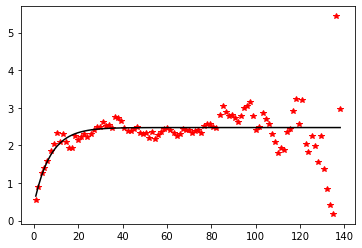

Executing Ordinary Kriging...



In [6]:
from pykrige.ok3d import OrdinaryKriging3D
OK = OrdinaryKriging3D(x,y,z,cu,variogram_model=best_para['variogram_model'],verbose=best_para['verbose'],weight=best_para['weight'],nlags=best_para['nlags'],exact_values=True)
#OK = OrdinaryKriging3D(x,y,z,cu,variogram_model='exponential',nlags=6,exact_values=False)
OK.display_variogram_model()
#df1 = df[0:200]
gridx = np.arange(x1,x2,1,dtype='float64')
gridy = np.arange(y1,y2,1,dtype='float64')
gridz = np.arange(z1,z2,1,dtype='float64')
zstar , ss = OK.execute('grid',gridx,gridy,gridz)

coordinate = np.vstack(np.meshgrid(gridx, gridy, gridz)).reshape(3,-1).T
coordinate = pd.DataFrame(coordinate,columns = ['X','Y','Z']).reset_index(drop=True)
cu_list = []
cu_std_list = []
for j in range(len(gridy)):
    for i in range(len(gridx)):
        for k in range(len(gridz)):
            cu_list.append(zstar[k,j,i]) ##Z Y X
            cu_std_list.append(ss[k,j,i])
            
cu_list = pd.DataFrame(cu_list,columns = ['CU_log_noise_kriging']).reset_index(drop=True)
cu_std_list = pd.DataFrame(cu_std_list,columns = ['CU_log_noise_kriging_std']).reset_index(drop=True)
kriging = pd.concat([coordinate,cu_list,cu_std_list],axis=1)

In [7]:
fig = go.Figure(px.scatter_3d(kriging, x="X",y="Y",z="Z",color='CU_log_noise_kriging'))
fig.update_traces(marker_size=3)
fig.update_layout(font=dict(size=14))
fig.update_layout(scene_aspectmode='data')
fig.show()

## randomly generate bore core data  

In [16]:
kriging.head(3)
kriging_sample = kriging.sample(n=500)

fig = go.Figure(px.scatter_3d(kriging_sample, x="X",y="Y",z="Z",color='CU_log_noise_kriging'))
fig.update_traces(marker_size=6)
fig.update_layout(scene = dict(xaxis = dict(tick0=2500,dtick=10,tickmode='linear'),
                      yaxis = dict(tick0=13200,dtick=10,tickmode='linear'),
                      zaxis = dict(tick0=1300,dtick=10,tickmode='linear'))) 
fig.update_layout(scene_aspectmode='data')
fig.show()

## 2nd Kriging using random bore core data

Adjusting data for anisotropy...
Initializing variogram model...
Using 'exponential' Variogram Model
Partial Sill: 0.45908446660591756
Full Sill: 0.45908446660591756
Range: 40.91612043826396
Nugget: 1.5502823296164732e-26 

Calculating statistics on variogram model fit...
Q1 = 0.022952978925182055
Q2 = 0.5584461064524506
cR = 0.13356284021294068 



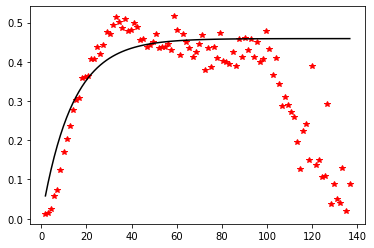

Executing Ordinary Kriging...



In [18]:
from pykrige.ok3d import OrdinaryKriging3D
x1 = np.array(kriging_sample['X']).reshape(-1,1)
y1 = np.array(kriging_sample['Y']).reshape(-1,1)
z1 = np.array(kriging_sample['Z']).reshape(-1,1)
cu1 = np.array(kriging_sample['CU_log_noise_kriging'])
OK1 = OrdinaryKriging3D(x1,y1,z1,cu1,variogram_model=best_para['variogram_model'],verbose=best_para['verbose'],weight=best_para['weight'],nlags=best_para['nlags'],exact_values=True)
#OK = OrdinaryKriging3D(x,y,z,cu,variogram_model='exponential',nlags=6,exact_values=False)
OK1.display_variogram_model()

x1 = 3000
x2 = x1 + 100
y1 = 13000
y2 = y1 + 100
z1 = 1300
z2 = z1+50

gridx = np.arange(x1,x2,1,dtype='float64')
gridy = np.arange(y1,y2,1,dtype='float64')
gridz = np.arange(z1,z2,1,dtype='float64')
zstar1 , ss1 = OK1.execute('grid',gridx,gridy,gridz)

coordinate1 = np.vstack(np.meshgrid(gridx, gridy, gridz)).reshape(3,-1).T
coordinate1 = pd.DataFrame(coordinate1,columns = ['X','Y','Z']).reset_index(drop=True)
cu_list1 = []
cu_std_list1 = []
for j in range(len(gridy)):
    for i in range(len(gridx)):
        for k in range(len(gridz)):
            cu_list1.append(zstar1[k,j,i]) ##Z Y X
            cu_std_list1.append(ss1[k,j,i])
            
cu_list1 = pd.DataFrame(cu_list1,columns = ['CU_log_noise_kriging']).reset_index(drop=True)
cu_std_list1 = pd.DataFrame(cu_std_list1,columns = ['CU_log_noise_kriging_std']).reset_index(drop=True)
kriging1 = pd.concat([coordinate1,cu_list1,cu_std_list1],axis=1)

fig = go.Figure(px.scatter_3d(kriging1, x="X",y="Y",z="Z",color='CU_log_noise_kriging'))
fig.update_traces(marker_size=6)
fig.update_layout(scene = dict(xaxis = dict(tick0=2500,dtick=10,tickmode='linear'),
                      yaxis = dict(tick0=13200,dtick=10,tickmode='linear'),
                      zaxis = dict(tick0=1300,dtick=10,tickmode='linear'))) 
fig.update_layout(scene_aspectmode='data')
fig.show()

## interpolated bore core at centre of each block

In [19]:
xx1 = np.arange(3000, 3100, 20).astype('float64')
yy1 = np.arange(13000, 13100, 20).astype('float64')
zz1 = np.arange(1300, 1350, 10).astype('float64')
blocks = []
for k in zz1:
    for j in yy1:
        for i in xx1:
            sub_block = kriging.loc[(pd.to_numeric(kriging["X"], errors='coerce')>=i) & (pd.to_numeric(kriging["X"], errors='coerce')<i+20) &
                         (pd.to_numeric(kriging["Y"], errors='coerce')>=j) & (pd.to_numeric(kriging["Y"], errors='coerce')<j+20)
                         &(pd.to_numeric(kriging["Z"], errors='coerce')>=k) & (pd.to_numeric(kriging["Z"], errors='coerce')<k+10)]
            blocks.append(sub_block)

blocks_borecore = []
for k in zz1:
    for j in yy1:
        for i in xx1:
            sub_block = df.loc[(pd.to_numeric(df["X"], errors='coerce')>=i) & (pd.to_numeric(df["X"], errors='coerce')<i+20) &
                         (pd.to_numeric(df["Y"], errors='coerce')>=j) & (pd.to_numeric(df["Y"], errors='coerce')<j+20)
                         &(pd.to_numeric(df["Z"], errors='coerce')>=k) & (pd.to_numeric(df["Z"], errors='coerce')<k+10)]
            blocks_borecore.append(sub_block)

xx2 = np.arange(3010, 3100, 20).astype('float64')
yy2 = np.arange(13010, 13100, 20).astype('float64')
zz2 = np.arange(1305, 1350, 10).astype('float64')
centre_simulated_bore_core_coordinate = np.vstack(np.meshgrid(xx2, yy2, zz2, indexing='ij')).reshape(3,-1).T
centre_simulated_bore_core_coordinate = pd.DataFrame(centre_simulated_bore_core_coordinate,columns=['X','Y','Z'])
centre_simulated_bore_core_coordinate = pd.merge(centre_simulated_bore_core_coordinate, kriging, on=['X','Y','Z'],how='left')
coordinates = []
for i in range(len(blocks)):
    list2 = []
    list2.append(int(blocks[i]['X'].mean()+0.5))
    list2.append(int(blocks[i]['Y'].mean()+0.5))
    list2.append(int(blocks[i]['Z'].mean()+0.5))
    list2.append(blocks[i]['CU_log_noise_kriging'].mean())
    coordinates.append(list2)
coordinates = pd.DataFrame(coordinates,columns=['X','Y','Z','CU_log_noise_kriging'])
coordinates_update = coordinates
fig = go.Figure(px.scatter_3d(coordinates_update, x="X",y="Y",z="Z",color='CU_log_noise_kriging'))
fig.update_traces(marker_size=6)
fig.update_layout(scene = dict(xaxis = dict(tick0=2500,dtick=10,tickmode='linear'),
                      yaxis = dict(tick0=13200,dtick=10,tickmode='linear'),
                      zaxis = dict(tick0=1300,dtick=10,tickmode='linear'))) 
fig.update_layout(scene_aspectmode='data')
fig.show()


## 2nd Kriging 

Adjusting data for anisotropy...
Initializing variogram model...
Using 'exponential' Variogram Model
Partial Sill: 0.2670243497003429
Full Sill: 0.2670243497003429
Range: 42.33453408959959
Nugget: 1.9504428748647708e-17 

Calculating statistics on variogram model fit...
Q1 = 0.19618432831917768
Q2 = 0.6554923006757954
cR = 0.1340598480979317 



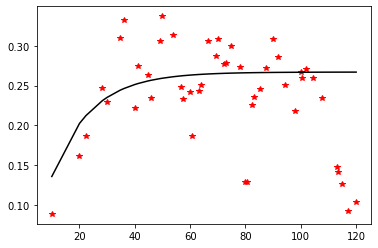

Executing Ordinary Kriging...



In [20]:
from pykrige.ok3d import OrdinaryKriging3D
x1 = np.array(coordinates['X']).reshape(-1,1)
y1 = np.array(coordinates['Y']).reshape(-1,1)
z1 = np.array(coordinates['Z']).reshape(-1,1)
cu1 = np.array(coordinates['CU_log_noise_kriging'])
OK1 = OrdinaryKriging3D(x1,y1,z1,cu1,variogram_model=best_para['variogram_model'],verbose=best_para['verbose'],weight=best_para['weight'],nlags=best_para['nlags'],exact_values=True)
#OK = OrdinaryKriging3D(x,y,z,cu,variogram_model='exponential',nlags=6,exact_values=False)
OK1.display_variogram_model()

x1 = 3000
x2 = x1 + 100
y1 = 13000
y2 = y1 + 100
z1 = 1300
z2 = z1+50

gridx = np.arange(x1,x2,1,dtype='float64')
gridy = np.arange(y1,y2,1,dtype='float64')
gridz = np.arange(z1,z2,1,dtype='float64')
zstar1 , ss1 = OK1.execute('grid',gridx,gridy,gridz)

coordinate1 = np.vstack(np.meshgrid(gridx, gridy, gridz)).reshape(3,-1).T
coordinate1 = pd.DataFrame(coordinate1,columns = ['X','Y','Z']).reset_index(drop=True)
cu_list1 = []
cu_std_list1 = []
for j in range(len(gridy)):
    for i in range(len(gridx)):
        for k in range(len(gridz)):
            cu_list1.append(zstar1[k,j,i]) ##Z Y X
            cu_std_list1.append(ss1[k,j,i])
            
cu_list1 = pd.DataFrame(cu_list1,columns = ['CU_log_noise_kriging']).reset_index(drop=True)
cu_std_list1 = pd.DataFrame(cu_std_list1,columns = ['CU_log_noise_kriging_std']).reset_index(drop=True)
kriging1 = pd.concat([coordinate1,cu_list1,cu_std_list1],axis=1)

fig = go.Figure(px.scatter_3d(kriging1, x="X",y="Y",z="Z",color='CU_log_noise_kriging'))
fig.update_traces(marker_size=6)
fig.update_layout(scene = dict(xaxis = dict(tick0=2500,dtick=10,tickmode='linear'),
                      yaxis = dict(tick0=13200,dtick=10,tickmode='linear'),
                      zaxis = dict(tick0=1300,dtick=10,tickmode='linear'))) 
fig.update_layout(scene_aspectmode='data')
fig.show()